# Question1: Identify the factors that impact clients choosing a tasker in the result page.

For this problem, the dataset contains 30,000 datapoints with no missing values.
Since the dependent variable is binary variable (whether a tasker is hired or not), I will use classification models to predict this target variable by understanding the main drivers of a tasker being hired.

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv('Analytics_data.csv')

In [4]:
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()

In [5]:
df = dataset.copy()

In [6]:
df.head()

,funnel_search_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,9/1/17 0:32,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,9/1/17 0:32,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,9/1/17 0:32,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,9/1/17 0:32,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,9/1/17 0:32,1013579273,5,29,39,0,Furniture Assembly


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
funnel_search_id       30000 non-null object
created_at             30000 non-null object
tasker_id              30000 non-null int64
position               30000 non-null int64
hourly_rate            30000 non-null int64
num_completed_tasks    30000 non-null int64
hired                  30000 non-null int64
category               30000 non-null object
dtypes: int64(5), object(3)
memory usage: 1.8+ MB


In [8]:
categorical_feature = [
    'position',
    'category'
]
numerical_feature = [
    'hourly_rate',
    'num_completed_tasks'
]
target = 'hired'

In [9]:
df[numerical_feature].describe()

,hourly_rate,num_completed_tasks
count,30000.000000,30000.000000
mean,57.482533,221.235700
std,36.222860,279.801812
min,18.000000,0.000000
25%,38.000000,23.000000
50%,45.000000,114.000000
75%,60.000000,300.250000
max,290.000000,1406.000000


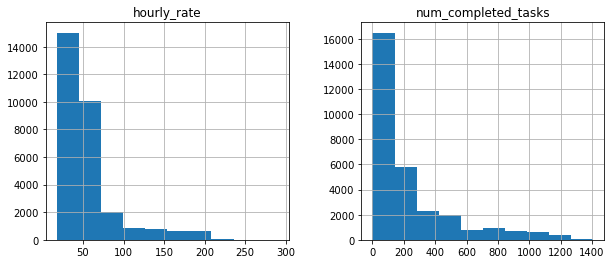

In [10]:
df[numerical_feature].hist(figsize=(10,4))
plt.show()

hourly_rate and num_completed_tasks distributions are right-skewed with the bulk of tasker charging 18-70 dollars per hour and completing 0-250 tasks. Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

Target Variable: hired

In [11]:
# 'hired' indicates if the tasker is hired ('1') or not hired ('0')
df['hired'].value_counts()

0    28295
1     1705
Name: hired, dtype: int64

In [12]:
print("Percentage of tasker bering hired is {:.1f}% and of tasker not being hired is: {:.1f}%".format(
    df[df['hired'] == 1].shape[0] / df.shape[0]*100,
    df[df['hired'] == 0].shape[0] / df.shape[0]*100))

Percentage of tasker bering hired is 5.7% and of tasker not being hired is: 94.3%


In [13]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

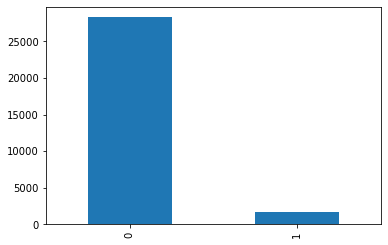

In [14]:
# Plot target variable
df[target].value_counts().plot(kind='bar')

As shown above, we see this is an imbalanced class problem. Indeed, the percentage of being hired in our dataset is 5.7% and the percentage of not being hired is: 94.4%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

Correlation: Find correlations with the target and sort

In [15]:
# Drop IDs and timestamp
df_trans = df.copy()
df_trans = df_trans.drop(
    ['funnel_search_id', 'created_at', 'tasker_id'], axis=1)

In [16]:
correlations = df_trans.corr()['hired'].sort_values()
print(correlations)

position              -0.213608
hourly_rate           -0.046519
num_completed_tasks    0.041825
hired                  1.000000
Name: hired, dtype: float64


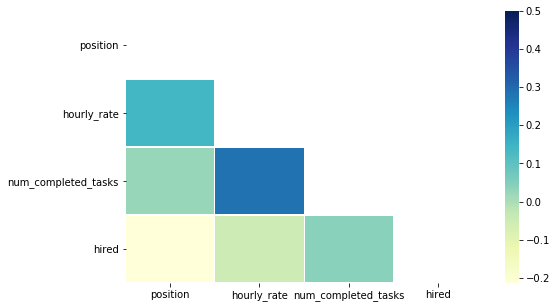

In [18]:
import numpy as np
# Calculate correlations
corr = df_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

Encoding

In [19]:
df1 = df_trans.copy()

In [20]:
from sklearn.preprocessing import OneHotEncoder 
oneHotEc = OneHotEncoder() 
# tranforming the column after fitting 
oneHotEc_array = oneHotEc.fit_transform(df1[['category']]).toarray() 
# converting arrays to a dataframe 
oneHotEc_colm = pd.DataFrame(oneHotEc_array) 
oneHotEc_colm.columns = oneHotEc.get_feature_names(['category'])
# concating dataframes  
df1 = pd.concat([df1, oneHotEc_colm], axis = 1)  
# removing the encoded column. 
df1 = df1.drop(['category'], axis = 1)  
df1.head(10) 


,position,hourly_rate,num_completed_tasks,hired,category_Furniture Assembly,category_Mounting,category_Moving Help
0,1,38,151,0,1.0,0.0,0.0
1,2,40,193,0,1.0,0.0,0.0
2,3,28,0,0,1.0,0.0,0.0
3,4,43,303,0,1.0,0.0,0.0
4,5,29,39,0,1.0,0.0,0.0
5,6,28,2,0,1.0,0.0,0.0
6,7,29,9,0,1.0,0.0,0.0
7,8,29,8,0,1.0,0.0,0.0
8,9,28,0,0,1.0,0.0,0.0
9,10,35,59,0,1.0,0.0,0.0


In [21]:
df2 = df1.copy()
from category_encoders import BinaryEncoder  
BinaryEc = BinaryEncoder(cols =['position'])  
# tranforming the column after fitting 
Binary_colm = BinaryEc.fit_transform(df2['position'])

# concating dataframe 
df2 = pd.concat([df2, Binary_colm], axis = 1)  
# dropping old column  
df2 = df2.drop(['position'], axis = 1) 
df2.head(10) 

,hourly_rate,num_completed_tasks,hired,category_Furniture Assembly,category_Mounting,category_Moving Help,position_0,position_1,position_2,position_3,position_4
0,38,151,0,1.0,0.0,0.0,0,0,0,0,1
1,40,193,0,1.0,0.0,0.0,0,0,0,1,0
2,28,0,0,1.0,0.0,0.0,0,0,0,1,1
3,43,303,0,1.0,0.0,0.0,0,0,1,0,0
4,29,39,0,1.0,0.0,0.0,0,0,1,0,1
5,28,2,0,1.0,0.0,0.0,0,0,1,1,0
6,29,9,0,1.0,0.0,0.0,0,0,1,1,1
7,29,8,0,1.0,0.0,0.0,0,1,0,0,0
8,28,0,0,1.0,0.0,0.0,0,1,0,0,1
9,35,59,0,1.0,0.0,0.0,0,1,0,1,0


Feature Scaling

In [22]:
df3 = df2.copy()
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_col = list(df3.columns)
df_col.remove('hired')
for col in df_col:
    df3[col] = df3[col].astype(float)
    df3[[col]] = scaler.fit_transform(df3[[col]])
df3['hired'] = pd.to_numeric(df3['hired'], downcast='float')
df3.head()

,hourly_rate,num_completed_tasks,hired,category_Furniture Assembly,category_Mounting,category_Moving Help,position_0,position_1,position_2,position_3,position_4
0,0.367647,0.536984,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.404412,0.686344,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,0.183824,0.000000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
3,0.459559,1.077525,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,0.202206,0.138691,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0


In [23]:
print('Size of Full Encoded Dataset: {}'. format(df3.shape))

Size of Full Encoded Dataset: (30000, 11)


Splitting data into training and testing sets

In [24]:
# assign the target to a new dataframe and convert it to a numerical feature
df4 = df3.copy()
target = df3['hired'].copy()
df4.drop(['hired'], axis=1, inplace=True)

In [25]:
df4.head()

,hourly_rate,num_completed_tasks,category_Furniture Assembly,category_Mounting,category_Moving Help,position_0,position_1,position_2,position_3,position_4
0,0.367647,0.536984,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.404412,0.686344,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,0.183824,0.000000,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
3,0.459559,1.077525,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,0.202206,0.138691,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22500, 10)
Number transactions y_train dataset:  (22500,)
Number transactions X_test dataset:  (7500, 10)
Number transactions y_test dataset:  (7500,)


In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Building Machine Learning Models

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('GradientBoosting',GradientBoostingClassifier(random_state=7)))

In [30]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv = kfold, scoring = 'accuracy')

    cv_auc_results = cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv = kfold, scoring = 'roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,GradientBoosting,82.03,1.48,94.34,0.48
1,Random Forest,79.67,1.88,94.09,0.49
0,Logistic Regression,77.42,2.10,65.42,1.27
3,KNN,75.05,1.39,94.04,0.57
5,Gaussian NB,74.57,2.42,94.24,0.53
4,Decision Tree Classifier,72.47,1.89,93.55,0.61
2,SVM,58.49,2.58,94.32,0.49


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

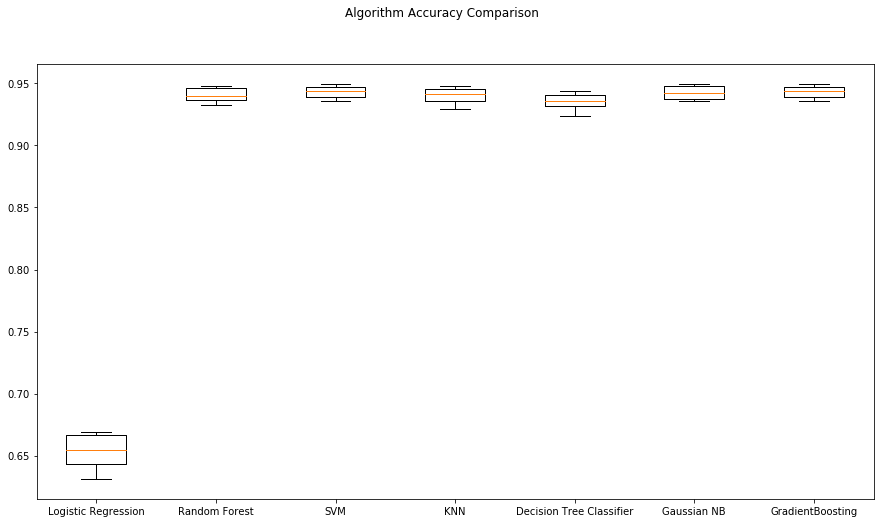

In [35]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

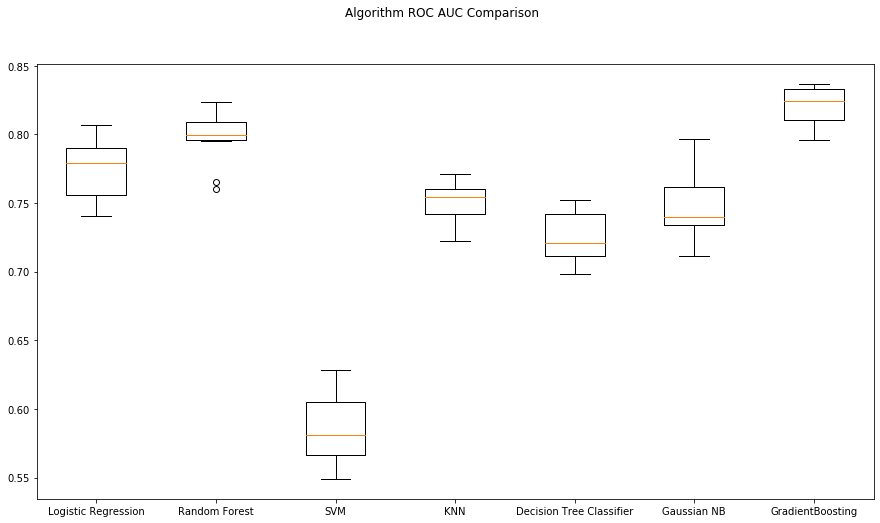

In [36]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Based on our ROC AUC comparison analysis, Gradient Boosting and Random Forest show the highest mean AUC scores. We will shortlist these two algorithms for further analysis.

Parameter Tuning for Random Forest

In [75]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

rf_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

rf_fit = rf_obj.fit(X_train, y_train)
rf_opt = rf_fit.best_estimator_

print('='*20)
print("best params: " + str(rf_obj.best_estimator_))
print("best params: " + str(rf_obj.best_params_))
print('best score:', rf_obj.best_score_)
print('='*20)

C:\Users\fanxin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



best params: RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=125,
                       random_state=7)
best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
best score: 0.8333764228121043


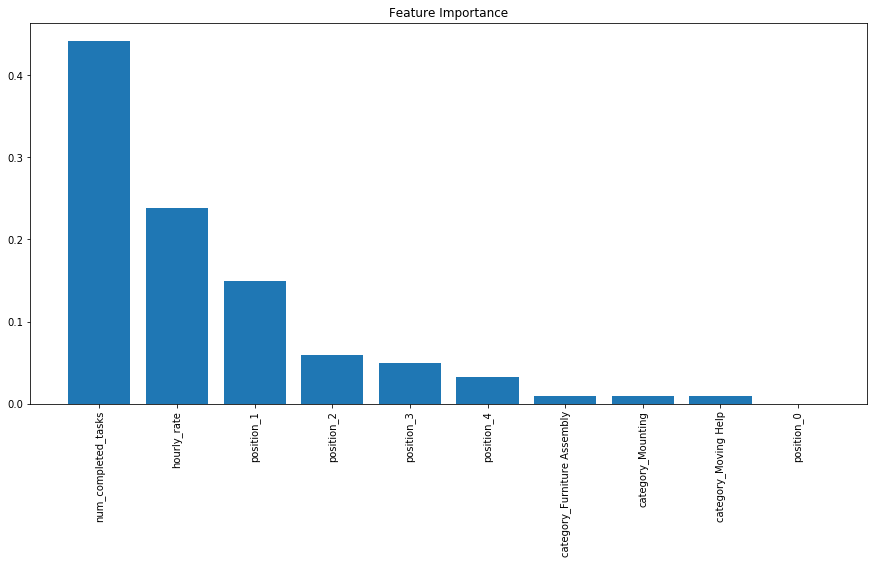

In [76]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [83]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(9):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff

,Feature,Coefficient
0,num_completed_tasks,0.441789
1,hourly_rate,0.238153
2,position_1,0.149454
3,position_2,0.059616
4,position_3,0.049866
5,category_Furniture Assembly,0.009777
6,category_Mounting,0.009382
7,category_Moving Help,0.009361
8,position_0,0.000000


Text(0.5, 257.44, 'Predicted label')

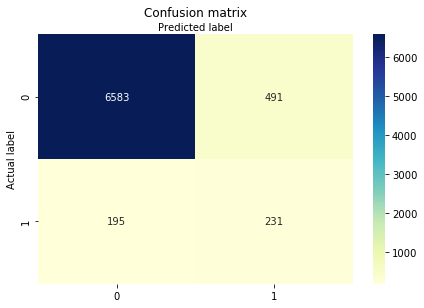

In [85]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
print('Accuracy of RandomForest Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Classifier on test set: 90.85


In [90]:
from sklearn.metrics import classification_report,roc_auc_score
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      7074
         1.0       0.32      0.54      0.40       426

    accuracy                           0.91      7500
   macro avg       0.65      0.74      0.68      7500
weighted avg       0.93      0.91      0.92      7500



In [91]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the tasker being hired
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.848


Parameter Tuning for Gradient Boosting

In [117]:
param_test1 = {'n_estimators':range(300,500,20)}
gsearch1 = GridSearchCV(
    estimator = GradientBoostingClassifier( 
#         min_samples_split=2,
#         min_samples_leaf=1,
#         max_depth=15,
#         max_features='sqrt',
        random_state=7), 
    param_grid = param_test1, 
    scoring='roc_auc',
    n_jobs=4,
    iid=True, 
    cv=10)
gsearch1.fit(X_train, y_train)
gsearch1.best_estimator_, gsearch1.best_params_, gsearch1.best_score_

(GradientBoostingClassifier(n_estimators=480, random_state=7),
 {'n_estimators': 480},
 0.835481093937975)

In [118]:
param_test2 = {'max_depth': [5, 10, 15, 20, 25]}
gsearch2 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        n_estimators=480, 
#         min_samples_split=2,
#         min_samples_leaf=1,
#         max_features='sqrt',  
        random_state=7), 
    param_grid = param_test2, 
    scoring='roc_auc',
    n_jobs=4,
    iid=True, 
    cv=10)
gsearch2.fit(X_train, y_train)
gsearch2.best_estimator_, gsearch2.best_params_, gsearch2.best_score_

(GradientBoostingClassifier(max_depth=5, n_estimators=480, random_state=7),
 {'max_depth': 5},
 0.857528543581497)

In [119]:
param_test3 = {'min_samples_split':[2,4,6,8,10],'min_samples_leaf': [1, 2, 3, 4]}
gsearch3 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        n_estimators=480, 
        max_depth=5, 
        random_state=7), 
    param_grid = param_test3, 
    scoring='roc_auc',
    n_jobs=4,
    iid=True, 
    cv=10)
gsearch3.fit(X_train, y_train)
gsearch3.best_estimator_, gsearch3.best_params_, gsearch3.best_score_

(GradientBoostingClassifier(max_depth=5, min_samples_split=6, n_estimators=480,
                            random_state=7),
 {'min_samples_leaf': 1, 'min_samples_split': 6},
 0.860702673166545)

In [120]:
param_test4 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch4 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        n_estimators=480, 
        max_depth=5, 
        min_samples_leaf=1, 
        min_samples_split = 6,
        random_state=7), 
    param_grid = param_test4, 
    scoring='roc_auc',
    n_jobs=4,
    iid=True, 
    cv=10)
gb_fit = gb_obj.fit(X_train, y_train)
gb_opt = gb_fit.best_estimator_
gsearch4.fit(X_train, y_train)
gsearch4.best_estimator_, gsearch4.best_params_, gsearch4.best_score_

(GradientBoostingClassifier(max_depth=5, min_samples_split=6, n_estimators=480,
                            random_state=7, subsample=0.85),
 {'subsample': 0.85},
 0.8669563494752045)

In [131]:
gb_opt = gsearch4.best_estimator_

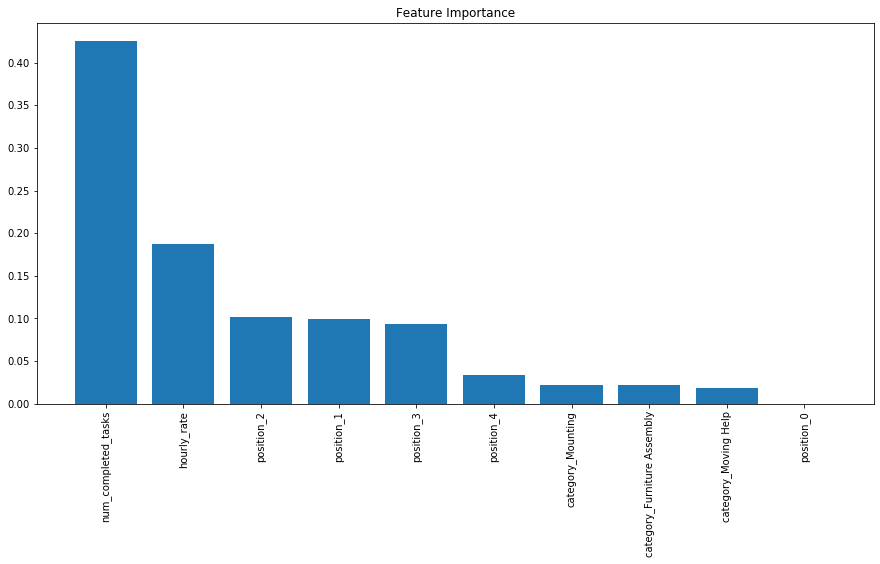

In [132]:
importances_1 = gb_opt.feature_importances_
indices_1 = np.argsort(importances_1)[::-1] # Sort feature importances in descending order
names_1 = [X_train.columns[i] for i in indices_1] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances_1[indices_1]) # Add bars
plt.xticks(range(X_train.shape[1]), names_1, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [133]:
importances_1 = gb_opt.feature_importances_
df_param_coeff_1 = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(9):
    feat_1 = X_train.columns[i]
    coeff_1 = importances_1[i]
    df_param_coeff_1.loc[i] = (feat_1, coeff_1)
df_param_coeff_1.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff_1 = df_param_coeff_1.reset_index(drop=True)
df_param_coeff_1

,Feature,Coefficient
0,num_completed_tasks,0.425291
1,hourly_rate,0.187632
2,position_2,0.101190
3,position_1,0.098721
4,position_3,0.093192
5,category_Mounting,0.021323
6,category_Furniture Assembly,0.021222
7,category_Moving Help,0.018098
8,position_0,0.000000


Text(0.5, 257.44, 'Predicted label')

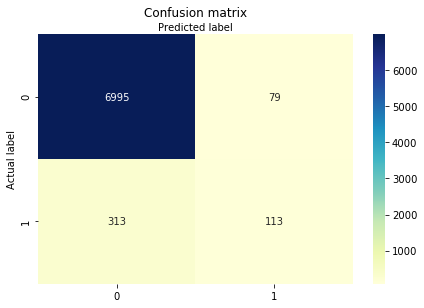

In [134]:
cnf_matrix_1 = metrics.confusion_matrix(y_test, gb_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [135]:
print('Accuracy of GradientBoosting Classifier on test set: {:.2f}'.format(gb_opt.score(X_test, y_test)*100))

Accuracy of GradientBoosting Classifier on test set: 94.77


In [136]:
# Classification report for the optimised RF Regression
gb_opt.fit(X_train, y_train)
print(classification_report(y_test, gb_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      7074
         1.0       0.59      0.27      0.37       426

    accuracy                           0.95      7500
   macro avg       0.77      0.63      0.67      7500
weighted avg       0.94      0.95      0.94      7500



In [138]:
gb_opt.fit(X_train, y_train) # fit optimised model to the training data
probs_1 = gb_opt.predict_proba(X_test) # predict probabilities
probs_1 = probs_1[:, 1] # we will only keep probabilities associated with the tasker being hired
gb_opt_roc_auc = roc_auc_score(y_test, probs_1) # calculate AUC score using test dataset
print('AUC score: %.3f' % gb_opt_roc_auc)

AUC score: 0.876


# Question 2: Increase customer retention

For XXX, whether customers would repeat with us is passive and we don't get informed that a customer is leaving. 
I think, the customer retention needs to be deduced by customer activity within a certain period of time.
We could draw a frequency distribution chart reporting purchase activity within different time intervals, in order to find the elbow point (such as 75% of active customers repeat purchasing products within 2 weeks).
Based on the analysis above, the dependent variable would be, for example, whether the existing customer would purchase our products again within 2 weeks.

Then we will create predictive models (classification models such as logistic regression, Support Vector Machines, Random Forest, KNN, GradientBoosting) to determine the factors that influence customer retention.
And the specific steps would be similar with what I did in Question 1.

The features that I would use would be as follows:
1) Features regarding 'Customer Information':
Zip Code
Income Range
Gender
Occupation
Education
Do they have kids in the household?
How do they find your website/ product?

2) Features regarding 'Products':
Type of Product
Variety of Products
Product Preferences or Combos

3) Features regarding 'Purchase History':
Frequency of Purchase
Date of Last Purchase
Time of Day/Season of Purchase
Value of Purchases
Payment Methods

4) Features regarding 'Customer Interactions'
Service Questions
Online Visits
Complaint Resolutions
Complaint Priority
How do they complain — email or phone or twitter?
Frequency of complaints

# Question 3: 12 Month retention

To my understanding, we want to see whether our existing customer will purchase our products again after 12 months 

Method: A/B test

We could design experiments for A/B tests, using a statistical inference approach grounded in a hypothesis test

2 tests are run in parallel:
1) Treatment Group (Group A) - This group is exposed to the new web page, popup form, etc.
2) Control Group (Group B) - This group experiences no change from the current setup.

For example, we might offer a particular feature to randomly selected customers and not others, and then make comparisons; 
alternatively, we might add a feature to one product offering and compare its repeat sales to those of similar products where you haven’t offered the feature.

Then we can compare the conversion rates of the two groups using statistical inference (e.g. t-test, z-score, chi-squared test).